In [1]:
import findspark
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
import sys
%matplotlib inline
findspark.init('E:\\spark2.4.4\\spark-2.4.4-bin-hadoop2.7',edit_rc=True)
from pyspark.sql.types import StructType, StructField, LongType, StringType
from pyspark.sql import Row
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
import pandas as pd
# Initialize the environment
conf = SparkConf().setAppName('spark_jupyter').setMaster('local')
sc = SparkContext(conf=conf)
spark = SparkSession.builder.appName("spark_jupyter").getOrCreate()


data = pd.read_csv('E:\\py_workspace\\bao\\d20190910_house\\energydata_complete.csv').fillna(0)
data['Appliances'] = data['Appliances'].astype('float')
data['date'] = data['date'].astype('datetime64[ns]')
appli_group = data.groupby(['Appliances']).size().reset_index()

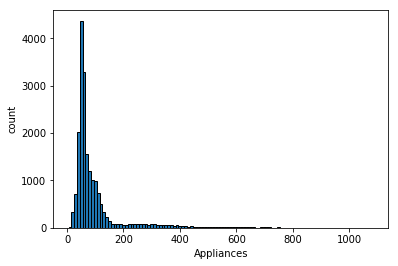

In [2]:
# Print the distribution of appliances' values
plt.bar(x=appli_group['Appliances'].values, height=appli_group[0].values, width=10, ec='black')
plt.xlabel("Appliances")
plt.ylabel("count")
plt.show()
plt.close()



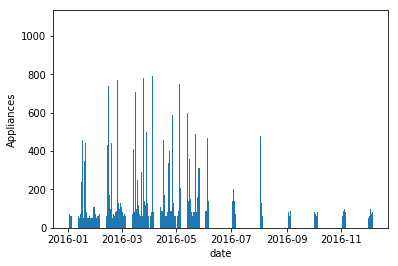

In [3]:
# Print the distribution of appliances' values as date
plt.bar(x=data['date'].values, height=data['Appliances'].values,width=0.1)
plt.xlabel("date")
plt.ylabel("Appliances")
plt.show()
plt.close()

In [4]:
# Print the column names and units
print(data.dtypes)


date           datetime64[ns]
Appliances            float64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object


In [5]:
# Print the basic information of the dataset
print(data.describe().astype(np.int64))

       Appliances  lights     T1   RH_1     T2   RH_2     T3   RH_3     T4  \
count       19735   19735  19735  19735  19735  19735  19735  19735  19735   
mean           97       3     21     40     20     40     22     39     20   
std           102       7      1      3      2      4      2      3      2   
min            10       0     16     27     16     20     17     28     15   
25%            50       0     20     37     18     37     20     36     19   
50%            60       0     21     39     20     40     22     38     20   
75%           100       0     22     43     21     43     23     41     22   
max          1080      70     26     63     29     56     29     50     26   

        RH_4  ...       T9   RH_9  T_out  Press_mm_hg  RH_out  Windspeed  \
count  19735  ...    19735  19735  19735        19735   19735      19735   
mean      39  ...       19     41      7          755      79          4   
std        4  ...        2      4      5            7      14        

In [6]:
print(data.isnull())

        date  Appliances  lights     T1   RH_1     T2   RH_2     T3   RH_3  \
0      False       False   False  False  False  False  False  False  False   
1      False       False   False  False  False  False  False  False  False   
2      False       False   False  False  False  False  False  False  False   
3      False       False   False  False  False  False  False  False  False   
4      False       False   False  False  False  False  False  False  False   
5      False       False   False  False  False  False  False  False  False   
6      False       False   False  False  False  False  False  False  False   
7      False       False   False  False  False  False  False  False  False   
8      False       False   False  False  False  False  False  False  False   
9      False       False   False  False  False  False  False  False  False   
10     False       False   False  False  False  False  False  False  False   
11     False       False   False  False  False  False  False  Fa

In [7]:
# Create the spark dataframe
# Transfer the dataframe from pandas into spark, and print data in spark dataframe
spark_df = spark.createDataFrame(data)
spark_df.show()


+-------------------+----------+------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----+-----------------+-----------+-----------+-----------+---------+------------------+------------------+
|               date|Appliances|lights|         T1|       RH_1|         T2|       RH_2|         T3|       RH_3|         T4|       RH_4|         T5|       RH_5|                T6|       RH_6|         T7|       RH_7|         T8|       RH_8|         T9|       RH_9|T_out|      Press_mm_hg|     RH_out|  Windspeed| Visibility|Tdewpoint|               rv1|               rv2|
+-------------------+----------+------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------------+-----------+-----------+-----------+-----------+-----------+-----------+--------

In [8]:
# Check the situation of each column with spark dataframe
spark_df.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- Appliances: double (nullable = true)
 |-- lights: long (nullable = true)
 |-- T1: double (nullable = true)
 |-- RH_1: double (nullable = true)
 |-- T2: double (nullable = true)
 |-- RH_2: double (nullable = true)
 |-- T3: double (nullable = true)
 |-- RH_3: double (nullable = true)
 |-- T4: double (nullable = true)
 |-- RH_4: double (nullable = true)
 |-- T5: double (nullable = true)
 |-- RH_5: double (nullable = true)
 |-- T6: double (nullable = true)
 |-- RH_6: double (nullable = true)
 |-- T7: double (nullable = true)
 |-- RH_7: double (nullable = true)
 |-- T8: double (nullable = true)
 |-- RH_8: double (nullable = true)
 |-- T9: double (nullable = true)
 |-- RH_9: double (nullable = true)
 |-- T_out: double (nullable = true)
 |-- Press_mm_hg: double (nullable = true)
 |-- RH_out: double (nullable = true)
 |-- Windspeed: double (nullable = true)
 |-- Visibility: double (nullable = true)
 |-- Tdewpoint: double (nullable = true)
 |-- r

In [9]:
def app_level(x):
    if x <= 50 :
        return 1
    elif x > 50 and x <= 80 :
        return 2
    elif x > 80 and x <= 125 :
        return 3
    elif x > 125 and x <= 140 :
        return 4
    elif x > 140 :
        return 5

data['Appliances_level'] = data['Appliances'].astype('float').apply(lambda x:app_level(x))


In [10]:
# in level2，1:low，2:medium，3:hight
def app_level2(x):
    if x == 1 :
        return 1
    elif x == 2 :
        return 1
    elif x == 3:
        return 2
    elif x == 4:
        return 2
    elif x == 5:
        return 3

# print(data.dtypes)
data['Appliances_level2'] = data['Appliances_level'].astype('int').apply(lambda x:app_level2(x))


In [11]:
# Use pandas to make division, then transfer the dataframe into spark
spark_df = spark.createDataFrame(data)
# Print the result of spark dataframe
spark_df.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- Appliances: double (nullable = true)
 |-- lights: long (nullable = true)
 |-- T1: double (nullable = true)
 |-- RH_1: double (nullable = true)
 |-- T2: double (nullable = true)
 |-- RH_2: double (nullable = true)
 |-- T3: double (nullable = true)
 |-- RH_3: double (nullable = true)
 |-- T4: double (nullable = true)
 |-- RH_4: double (nullable = true)
 |-- T5: double (nullable = true)
 |-- RH_5: double (nullable = true)
 |-- T6: double (nullable = true)
 |-- RH_6: double (nullable = true)
 |-- T7: double (nullable = true)
 |-- RH_7: double (nullable = true)
 |-- T8: double (nullable = true)
 |-- RH_8: double (nullable = true)
 |-- T9: double (nullable = true)
 |-- RH_9: double (nullable = true)
 |-- T_out: double (nullable = true)
 |-- Press_mm_hg: double (nullable = true)
 |-- RH_out: double (nullable = true)
 |-- Windspeed: double (nullable = true)
 |-- Visibility: double (nullable = true)
 |-- Tdewpoint: double (nullable = true)
 |-- r

In [12]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

train_data = VectorAssembler(inputCols=["lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"], outputCol="features").transform(spark_df)
train_data.show()

+-------------------+----------+------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----+-----------------+-----------+-----------+-----------+---------+------------------+------------------+----------------+-----------------+--------------------+
|               date|Appliances|lights|         T1|       RH_1|         T2|       RH_2|         T3|       RH_3|         T4|       RH_4|         T5|       RH_5|                T6|       RH_6|         T7|       RH_7|         T8|       RH_8|         T9|       RH_9|T_out|      Press_mm_hg|     RH_out|  Windspeed| Visibility|Tdewpoint|               rv1|               rv2|Appliances_level|Appliances_level2|            features|
+-------------------+----------+------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------

RH_out  -0.15228238090952514
RH_8  -0.09403862708021818
RH_6  -0.08317760704197767
RH_2  -0.06046476003142766
RH_7  -0.05564241833166298
RH_9  -0.051462011347263484
Press_mm_hg  -0.034884829082555795
rv1  -0.011144917533723816
rv2  -0.011144917533723816
Visibility  0.00023035785537267302
RH_5  0.006954536264048352
T9  0.010010284641807579
Tdewpoint  0.01535663610806702
RH_4  0.016965431417676733
T5  0.01975986060023773
T7  0.02580104462902617
RH_3  0.03629172115434516
T8  0.03957198110238408
T4  0.0402809830111149
T1  0.05544747184854765
T3  0.08505990237157356
RH_1  0.08603142531741659
Windspeed  0.08712210591290016
T_out  0.09915468001454299
T6  0.11763768941916676
T2  0.1200732829004558
lights  0.19727756020624468


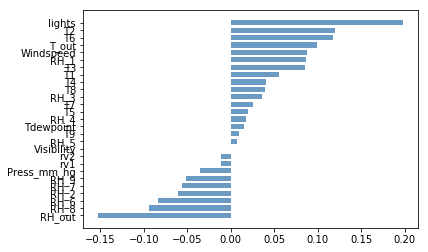

In [13]:
from pyspark.mllib.stat import Statistics

# seriesX = sc.parallelize(data.iloc[:,2:].values)  # a series
# seriesY = sc.parallelize(data.iloc[:,1].values)

# data_np_x = data.iloc[:,2].values
# Calculate the Pearson Correlation Coefficient with spark and sort the sequence of the columns, then print it
data_np_y = data.iloc[:,1].values.ravel()
data_keys = ["lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]
data_pearson = []
for key in data_keys:
    seriesX = sc.parallelize(data[key].values.ravel())
    seriesY = sc.parallelize(data_np_y)
    # Calculate the Pearson Correlation Coefficient and keep them in a list
    data_pearson.append(Statistics.corr(seriesX, seriesY, method="pearson"))

    # Sort the Pearson Correlation Coefficient 
pearson_dict  = dict(zip(data_keys, data_pearson))
pearson_dict_sort = sorted(pearson_dict.items(),key=lambda x:x[1])
pearson_sort_key = []
pearson_sort_value = []
pearson_drop_col = []
pearson_save_col_k = []
pearson_save_col_v = []
for i in pearson_dict_sort:
    pearson_sort_key.append(i[0])
    pearson_sort_value.append(i[1])
    if i[1] < 0 :
        pearson_drop_col.append(i[0])
    else :
        pearson_save_col_k.append(i[0])
        pearson_save_col_v.append(i[1])
    print(i[0] + '  ' + str(i[1]))

# 删除前的，用皮尔森系数计算的特征相关性
plt.barh(pearson_sort_key, pearson_sort_value, height=0.7, color='steelblue', alpha=0.8)
plt.show()
plt.close()


RH_3  0.0
RH_4  0.0
RH_6  0.0
RH_7  0.0
T_out  0.0
Windspeed  0.0
Tdewpoint  0.0
rv1  0.0
rv2  0.0
Visibility  0.0037696513041344964
RH_2  0.0038867485522190858
T9  0.007875755398432544
RH_1  0.00961430764547896
Press_mm_hg  0.010364399985666487
T1  0.012108321193819759
T4  0.018490172939639102
T5  0.023507240140785413
T6  0.02807127945881593
RH_5  0.03739400591899347
T3  0.04068489269804754
RH_9  0.046569268402489254
T8  0.05292581953923695
T7  0.057385935395287434
RH_8  0.07585609318271316
RH_out  0.09975964586524527
lights  0.219222138045404
T2  0.25251432433359117


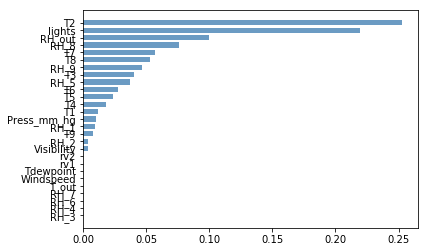

['RH_3', 'RH_4', 'RH_6', 'RH_7', 'T_out', 'Windspeed', 'Tdewpoint', 'rv1', 'rv2', 'Visibility', 'RH_2', 'T9', 'RH_1', 'Press_mm_hg', 'T1', 'T4', 'T5', 'T6', 'RH_5', 'T3', 'RH_9', 'T8', 'T7', 'RH_8', 'RH_out', 'lights', 'T2']
['Visibility', 'RH_2', 'T9', 'RH_1', 'Press_mm_hg', 'T1', 'T4', 'T5', 'T6', 'RH_5', 'T3', 'RH_9', 'T8', 'T7', 'RH_8', 'RH_out', 'lights', 'T2']


In [14]:
from pyspark.ml.classification import DecisionTreeClassifier

train_data = VectorAssembler(inputCols=["lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"], outputCol="features").transform(spark_df)

(trainingData, testData) = train_data.randomSplit([0.7, 0.3])
dt = DecisionTreeClassifier(labelCol="Appliances_level", featuresCol="features")
model = dt.fit(trainingData)
predictions = model.transform(testData)
# (27,[0,2,3,5,6,7,9,10,11,15,16,17,18,20,21],[0.24406060865259388,0.00530583024244807,0.2590053042866581,0.050896793700064544,0.008243066413877575,0.013567425240055433,0.016983146554817793,0.01601156394661409,0.018040183807954625,0.06911546280465411,0.09478948437663114,0.027214243556202538,0.06205587549990511,0.007097356849774304,0.10761365406774878])

data_dsTree = model.featureImportances.toArray().tolist()
data_keys = ["lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]

dsTree_dict  = dict(zip(data_keys, data_dsTree))
dsTree_dict_sort = sorted(dsTree_dict.items(),key=lambda x:x[1])
dsTree_sort_key = []
dsTree_sort_value = []
dsTree_drop_col = []
dsTree_save_col_k = []
dsTree_save_col_v = []
for i in dsTree_dict_sort:
    dsTree_sort_key.append(i[0])
    dsTree_sort_value.append(i[1])
    if i[1] <= 0 :
        dsTree_drop_col.append(i[0])
    else :
        dsTree_save_col_k.append(i[0])
        dsTree_save_col_v.append(i[1])
    print(i[0] + '  ' + str(i[1]))

data_new = data.drop(dsTree_drop_col,axis=1)
# print(type(print(model.featureImportances)))
# predictions.show(5)
plt.barh(dsTree_sort_key, dsTree_sort_value, height=0.7, color='steelblue', alpha=0.8)
plt.show()
plt.close()

print(dsTree_sort_key)
print(dsTree_save_col_k)
spark_df = spark.createDataFrame(data_new)

dict_keys([1, 3, 2])


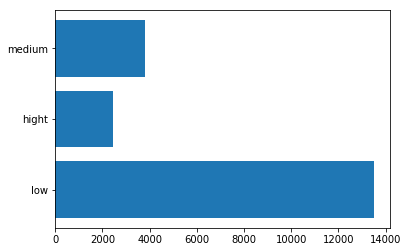

Using TensorFlow backend.


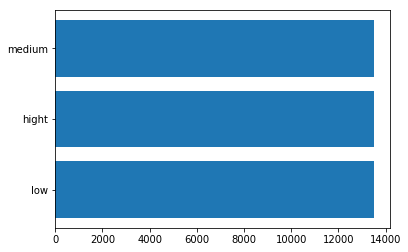

[[ 30.          19.89        47.59666667 ... 733.5         92.
   63.        ]
 [ 30.          19.89        46.69333333 ... 733.6         92.
   59.16666667]
 [ 30.          19.89        46.3        ... 733.7         92.
   55.33333333]
 ...
 [  0.          22.39        45.39085133 ... 749.86050662  68.4202638
   40.        ]
 [  0.          25.25993712  40.05515449 ... 749.86064755  44.41574461
   38.88762924]
 [  0.          19.71358252  46.5875606  ... 742.92106255  89.78937446
   31.66337619]]


In [15]:

X = data_new.values[:,2:-2]
y = data_new.values[:,-1:].ravel()
y = list(map(int, y))
from collections import Counter
print(Counter(y).keys())
plt.barh(['low','hight','medium'], list(Counter(y).values()))
# plt.xlabel("date")
# plt.ylabel("Appliances")
plt.show()
plt.close()

from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=42)
X_smo, y_smo = smo.fit_sample(X, y)
plt.barh(['low','hight','medium'], list(Counter(y_smo).values()))
# plt.xlabel("date")
# plt.ylabel("Appliances")
plt.show()
plt.close()
print(X_smo)


+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------------+-----------+-----------+-----------+-----------+-----------+-----------------+-----------+-----------+---+
|   0|          1|          2|          3|          4|          5|          6|          7|          8|                 9|         10|         11|         12|         13|         14|               15|         16|         17| 18|
+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------------+-----------+-----------+-----------+-----------+-----------+-----------------+-----------+-----------+---+
|30.0|      19.89|47.59666667|       19.2|      44.79|      19.79|       19.0|17.16666667|       55.2| 7.026666667000001|       17.2|       18.2|       48.9|17.03333333|      45.53|            733.5|       92.0|       63.0|1.0|
|30.0|      19.89|46.69333333|       19.2|    44.7225|      19.79|       19.0|17.1666666

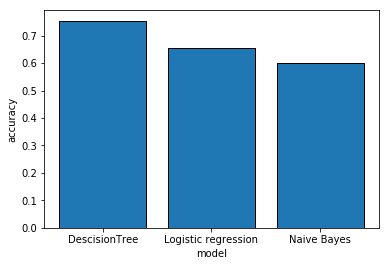

In [24]:
smo = np.column_stack((X_smo, y_smo))
smo_df = pd.DataFrame(smo)
smo_spark = spark.createDataFrame(smo_df)
smo_spark.show()
# Decision tree
train_data = VectorAssembler(inputCols=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"], outputCol="features").transform(smo_spark)
(trainingData, testData) = train_data.randomSplit([0.7, 0.3])
from pyspark.ml.classification import LogisticRegression
# Logistic regression model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8,featuresCol="features", labelCol="18")
# Fit the model
lrModel = lr.fit(trainingData)
lr_predictions = lrModel.transform(testData)
evaluator = MulticlassClassificationEvaluator(
    labelCol="18", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(lr_predictions)
print(accuracy)
0.32994294219796577

# bayesian classification model
from pyspark.ml.classification import NaiveBayes

from pyspark.ml.feature import MinMaxScaler
scalerData = MinMaxScaler(inputCol="features", outputCol="scaledFeatures").fit(train_data).transform(train_data)
nb = NaiveBayes(smoothing=1.0, modelType="multinomial",featuresCol="scaledFeatures", labelCol="18")
nb_model = nb.fit(scalerData)
nb_pre = nb_model.transform(scalerData)
accuracy = evaluator.evaluate(nb_pre)
print(accuracy)
#0.1537000024674908

'''
Decision tree：0.7546838561340121
Logistic regression：0.6537165885352413
bayesian classification：0.60038272759201435
'''
plt.bar(x=['DescisionTree','Logistic regression','Naive Bayes'], height=[0.7546838561340121,0.6537165885352413,0.60038272759201435],  ec='black')
plt.xlabel("model")
plt.ylabel("accuracy")
plt.show()
plt.close()

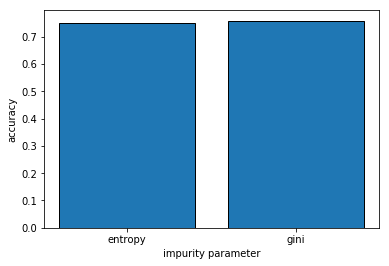

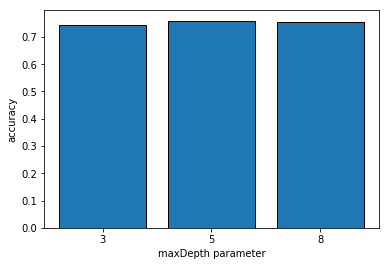

In [25]:
# Comparison over different variables
'''
impurity='entropy' 'gini'
0.7482748201932293
0.7582938193091083

'''
plt.bar(x=['entropy','gini'], height=[0.7482748201932293,0.7582938193091083],  ec='black')
plt.xlabel("impurity parameter")
plt.ylabel("accuracy")
plt.show()
plt.close()

'''
maxDepth=3 5 8
0.7449283190581239
0.7594812323481212
0.7539502385919238
'''
plt.bar(x=['3','5','8'], height=[0.7449283190581239,0.7594812323481212,0.7539502385919238],  ec='black')
plt.xlabel("maxDepth parameter")
plt.ylabel("accuracy")
plt.show()
plt.close()

In [26]:
print(data_new.columns.values[2:-2])

['lights' 'T1' 'RH_1' 'T2' 'RH_2' 'T3' 'T4' 'T5' 'RH_5' 'T6' 'T7' 'T8'
 'RH_8' 'T9' 'RH_9' 'Press_mm_hg' 'RH_out' 'Visibility']


+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------------+-----------+-----------+-----------+-----------+-----------+-----------------+-----------+-----------+---+--------------------+
|   0|          1|          2|          3|          4|          5|          6|          7|          8|                 9|         10|         11|         12|         13|         14|               15|         16|         17| 18|            features|
+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------------+-----------+-----------+-----------+-----------+-----------+-----------------+-----------+-----------+---+--------------------+
|30.0|      19.89|47.59666667|       19.2|      44.79|      19.79|       19.0|17.16666667|       55.2| 7.026666667000001|       17.2|       18.2|       48.9|17.03333333|      45.53|            733.5|       92.0|       63.0|1.0|[30.0,19.89,47.59...|
|30.

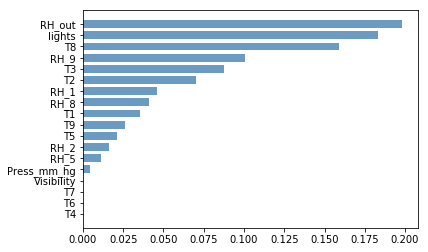

In [27]:
# Partition in decision tree
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
train_data = VectorAssembler(inputCols=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"], outputCol="features").transform(smo_spark)
train_data.show()
(trainingData, testData) = train_data.randomSplit([0.7, 0.3])
dt = DecisionTreeClassifier(labelCol="18", featuresCol="features")
model = dt.fit(trainingData)
predictions = model.transform(testData)
# (27,[0,2,3,5,6,7,9,10,11,15,16,17,18,20,21],[0.24406060865259388,0.00530583024244807,0.2590053042866581,0.050896793700064544,0.008243066413877575,0.013567425240055433,0.016983146554817793,0.01601156394661409,0.018040183807954625,0.06911546280465411,0.09478948437663114,0.027214243556202538,0.06205587549990511,0.007097356849774304,0.10761365406774878])

data_dsTree = model.featureImportances.toArray().tolist()

evaluator = MulticlassClassificationEvaluator(
    labelCol="15", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))
# Sort the importance of each factor
data_keys = data_new.columns.values[2:-2]

dsTree_dict  = dict(zip(data_keys, data_dsTree))
dsTree_dict_sort = sorted(dsTree_dict.items(),key=lambda x:x[1])
dsTree_sort_key = []
dsTree_sort_value = []

for i in dsTree_dict_sort:
    dsTree_sort_key.append(i[0])
    dsTree_sort_value.append(i[1])


plt.barh(dsTree_sort_key, dsTree_sort_value, height=0.7, color='steelblue', alpha=0.8)
plt.show()
plt.close()

In [28]:
model.toDebugString

'DecisionTreeClassificationModel (uid=DecisionTreeClassifier_cec468c86fe5) of depth 5 with 57 nodes\n  If (feature 0 <= 0.022417757048376785)\n   If (feature 16 <= 81.34334420431418)\n    If (feature 14 <= 36.398571430000004)\n     If (feature 1 <= 20.999069004440635)\n      If (feature 5 <= 21.298267178223078)\n       Predict: 2.0\n      Else (feature 5 > 21.298267178223078)\n       Predict: 1.0\n     Else (feature 1 > 20.999069004440635)\n      Predict: 2.0\n    Else (feature 14 > 36.398571430000004)\n     If (feature 11 <= 22.89039030800054)\n      If (feature 13 <= 17.450988228359154)\n       Predict: 1.0\n      Else (feature 13 > 17.450988228359154)\n       Predict: 3.0\n     Else (feature 11 > 22.89039030800054)\n      If (feature 5 <= 26.66907612002299)\n       Predict: 2.0\n      Else (feature 5 > 26.66907612002299)\n       Predict: 3.0\n   Else (feature 16 > 81.34334420431418)\n    If (feature 3 <= 19.065668581951364)\n     If (feature 12 <= 42.28230680417877)\n      If (featu

In [29]:
reg_data = data_new.iloc[:,1:-2]
spark_df = spark.createDataFrame(reg_data)

# print(data_keys)
# print(reg_data)
train_data = VectorAssembler(inputCols=data_keys, outputCol="features").transform(spark_df)

lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, labelCol="Appliances")
lrModel = lr.fit(train_data)

print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary

print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [2.1107987623318634,-1.565913297617682,9.481571096930146,2.0288908818501294,-2.3774925048688678,13.202522840672641,-6.857081219867687,-5.411360289809603,0.04741261601327163,0.36875936196307546,-3.5580996160885316,3.907808066140376,-5.061247721799968,-5.746841909527145,-1.7430346913258263,0.0,-0.49873570031085657,0.15619443866618404]
Intercept: 167.97196292385945
numIterations: 11
objectiveHistory: [0.49999999999999994, 0.48626826696077063, 0.465652014334032, 0.4534614957804051, 0.45016538457867555, 0.44016951844569663, 0.43879579345315756, 0.43732829223922287, 0.43678046774291945, 0.43571156383534443, 0.4353852865100833]
+-------------------+
|          residuals|
+-------------------+
|-116.35069766743817|
|-107.21784692345483|
| -114.6769075587957|
|-133.99497882129032|
| -125.6251326514132|
| -132.9522994625723|
|-141.16018793569407|
|-138.63223167772733|
|-117.60801259763721|
| -113.4554206149314|
|-14.691719145558807|
| 352.85496777958554|
| 208.26753000415852|
|  6.

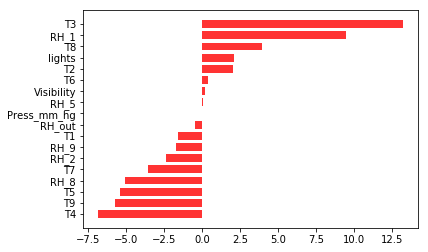

In [30]:
data_regress = lrModel.coefficients
regress_dict  = dict(zip(data_keys, data_regress))
regress_dict_sort = sorted(regress_dict.items(),key=lambda x:x[1])
regress_sort_key = []
regress_sort_value = []

for i in regress_dict_sort:
    regress_sort_key.append(i[0])
    regress_sort_value.append(i[1])
    
plt.barh(regress_sort_key, regress_sort_value, height=0.7, color='red', alpha=0.8)
plt.show()
plt.close()

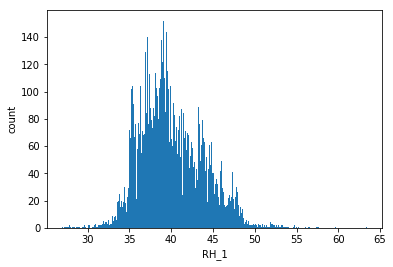

In [32]:
rh1_group = data.groupby(['RH_1']).size().reset_index()
# # 打印RH_1分布
plt.bar(x=rh1_group['RH_1'].values, height=rh1_group[0].values,width=0.1)
plt.xlabel("RH_1")
plt.ylabel("count")
plt.show()
plt.close()

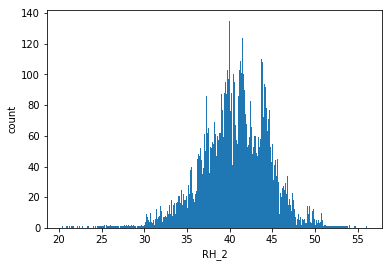

In [33]:
rh2_group = data.groupby(['RH_2']).size().reset_index()
# 打印RH_2分布
plt.bar(x=rh2_group['RH_2'].values, height=rh2_group[0].values,width=0.1)
plt.xlabel("RH_2")
plt.ylabel("count")
plt.show()
plt.close()

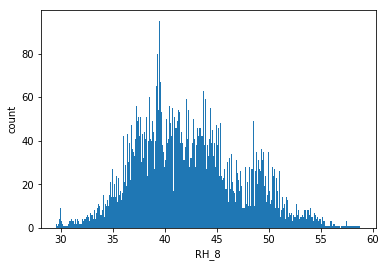

In [34]:
rh8_group = data.groupby(['RH_8']).size().reset_index()
# 打印RH_8分布
plt.bar(x=rh8_group['RH_8'].values, height=rh8_group[0].values,width=0.1)
plt.xlabel("RH_8")
plt.ylabel("count")
plt.show()
plt.close()


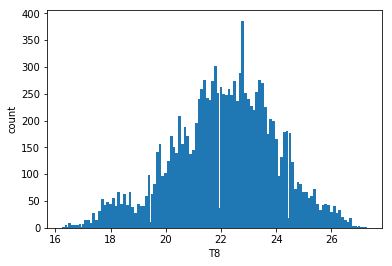

In [35]:
t8_group = data.groupby(['T8']).size().reset_index()
# 打印t8分布
plt.bar(x=t8_group['T8'].values, height=t8_group[0].values,width=0.1)
plt.xlabel("T8")
plt.ylabel("count")
plt.show()
plt.close()

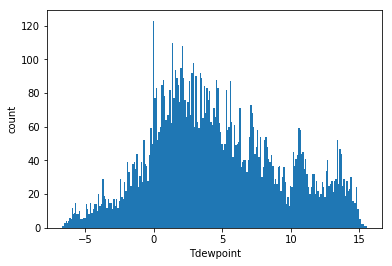

In [36]:
Tdewpoint_group = data.groupby(['Tdewpoint']).size().reset_index()
# 打印Tdewpoint分布
plt.bar(x=Tdewpoint_group['Tdewpoint'].values, height=Tdewpoint_group[0].values,width=0.1)
plt.xlabel("Tdewpoint")
plt.ylabel("count")
plt.show()
plt.close()